# Predicting Mumbai, India Rental prices
## Phase 1: Data Preparation

### Group Members

##### Arka Dasgupta (studentID)
##### Geetesh Matreja (s3931386)
##### Yashvardhan Rana (s3959907)

## Table of Contents
* [Introduction](#itr) 
  + [Dataset Source](#Dataset-Source)
  + [Dataset Details](#Dataset-Details)
  + [Dataset Features](#Dataset-Features)
  + [Target Feature](#Target-Feature)
* [Goals and Objectives](#Goals-and-Objectives)
* [Data Cleaning and Preprocessing](#Data-Cleaning-and-Preprocessing)
* [Data Exploration and Visualisation](#Data-Exploration-and-Visualisation)
* [Summary and Conclusion](#Summary-and-Conclusion)
* [References](#References)



# Introduction 


Indian Rental House Price dataset provides comprehensive information about rental house prices across various locations in India however we will be using the data of Delhi and Mumbai for this project study. This dataset is sourced from kaggle  

## Dataset Source 

- Indian Rental House Price - "https://www.kaggle.com/datasets/bhavyadhingra00020/india-rental-house-price" by Bhavya Dhingra.
- Indain_housing_Mumbai_data.csv is used in this assignment to get a precise and detailed analysis about one city

## Dataset Details

It includes details such as house type, size, location, city, latitude, longitude, price, currency, number of bathrooms, number of balconies, negotiability of price, price per square foot, verification date, description of the property, security deposit, and status of furnishing (furnished, unfurnished, semi-furnished).

The csv file has 16 descriptive variables and 5001 units of rows. As the assignment has a cap of 5000 rows we will later do a random sampling of 5000 rows which mean one observation will be deleted 

### Aim

We tend to analyse the rental trends, comparison of prices across both the cities and property types, understand different factors that impact rental prices and hopefull try to forcast future prices as well

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

pd.set_option('display.max_columns', None) 

###
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use("seaborn")
###

In [2]:
import pandas as pd

# URL of the raw CSV file on GitHub
url = 'https://raw.githubusercontent.com/serapheon98/ML1-RMIT/Test/Indian_housing_Mumbai_data.csv'

# Read the CSV file into a DataFrame named "mumbai"
mumbai = pd.read_csv(url)

# Display the head of the DataFrame
mumbai.head(10)



,house_type,house_size,location,city,latitude,longitude,price,currency,numBathrooms,numBalconies,isNegotiable,priceSqFt,verificationDate,description,SecurityDeposit,Status
0,2 BHK Apartment,"1,180 sq ft",Ulwe,Mumbai,18.971046,73.017723,19000,INR,2.0,NaN,NaN,NaN,Posted 2 years ago,It has area of 1180 sqft and is available at a...,No Deposit,Furnished
1,2 BHK Apartment,"1,120 sq ft",Ulwe,Mumbai,18.966377,73.012802,12500,INR,2.0,NaN,NaN,NaN,Posted 2 years ago,Well designed 2 bhk multistorey apartment is a...,No Deposit,Unfurnished
2,2 BHK Apartment,"1,200 sq ft",Panvel,Mumbai,18.965979,73.124649,22000,INR,2.0,NaN,NaN,NaN,Posted a month ago,A spacious 2 bhk multistorey apartment is avai...,No Deposit,Unfurnished
3,2 BHK Apartment,750 sq ft,Kandivali West,Mumbai,19.213598,72.833633,28500,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,It has a built-up area of 750 sqft and is avai...,No Deposit,Unfurnished
4,3 BHK Apartment,"1,400 sq ft",Chembur,Mumbai,19.062933,72.892395,50000,INR,3.0,NaN,NaN,NaN,Posted 3 years ago,The house is semi-furnished. It has power back...,No Deposit,Semi-Furnished
5,1 RK Studio Apartment,450 sq ft,Badlapur East,Mumbai,19.144207,73.246994,3000,INR,1.0,NaN,NaN,NaN,Posted 3 years ago,This spacious 1 rk multistorey apartment is av...,No Deposit,Unfurnished
6,1 BHK Apartment,700 sq ft,Dombivali,Mumbai,19.227549,73.081505,9500,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,Well designed 1 bhk multistorey apartment is a...,No Deposit,Unfurnished
7,1 BHK Apartment,600 sq ft,Bandra West,Mumbai,19.061171,72.831627,55000,INR,2.0,NaN,NaN,NaN,Posted 3 years ago,A 1 bhk property is available for rental in Sw...,No Deposit,Furnished
8,1 BHK Apartment,600 sq ft,Andheri East,Mumbai,19.108765,72.865692,50000,INR,2.0,NaN,NaN,NaN,Posted 3 months ago,It has an area of 600 sqft with a carpet area ...,No Deposit,Furnished
9,2 BHK Apartment,"1,045 sq ft",Bhayandar East,Mumbai,19.307293,72.861748,25000,INR,1.0,NaN,NaN,NaN,Posted a month ago,It has area of 1045 sqft and is available at a...,No Deposit,Semi-Furnished


In [4]:
## Dataset Features

from tabulate import tabulate

# Define the data
data = [
    ["Name of the feature", "Data type", "Units", "Brief Description"],
    ["house_type", "Categorical", "None", "Type of house (e.g., apartment, villa)"],
    ["house_size", "Numeric", "square ft", "Size of the house"],
    ["location", "Categorical", "None", "Location of the house"],
    ["city", "Categorical", "None", "City where the house is located"],
    ["latitude", "Numeric", "degrees", "Latitude of the house location"],
    ["longitude", "Numeric", "degrees", "Longitude of the house location"],
    ["price", "Numeric", "currency (INR)", "Price of the house"],
    ["currency", "Categorical", "None", "Currency of the price"],
    ["numBathrooms", "Numeric", "count", "Number of bathrooms in the house"],
    ["numBalconies", "Numeric", "count", "Number of balconies in the house"],
    ["isNegotiable", "Categorical", "None", "Indicates if the price is negotiable"],
    ["priceSqFt", "Categorical", "None", "Price per square foot"],
    ["verificationDate", "Categorical", "None", "Date of verification"],
    ["description", "Categorical", "None", "Description of the house"],
    ["SecurityDeposit", "Categorical", "None", "Security deposit required"],
    ["Status", "Categorical", "None", "Status of the house (e.g., available, rented)"],
    # Add more rows as needed
]

# Print the table
print(tabulate(data, headers="firstrow", tablefmt="grid"))


+-----------------------+-------------+----------------+-----------------------------------------------+
| Name of the feature   | Data type   | Units          | Brief Description                             |
+=======================+=============+================+===============================================+
| house_type            | Categorical | None           | Type of house (e.g., apartment, villa)        |
+-----------------------+-------------+----------------+-----------------------------------------------+
| house_size            | Numeric     | square ft      | Size of the house                             |
+-----------------------+-------------+----------------+-----------------------------------------------+
| location              | Categorical | None           | Location of the house                         |
+-----------------------+-------------+----------------+-----------------------------------------------+
| city                  | Categorical | None           

## Target Feature
- For Yash

## Goals and Objective
- For Yash

## Data cleaning and Preprocessing

This is the task 3 of the assignment and following tasks will be included for this task
- Replacing Values for better understanding
- Finding out missing values and dealing with them
- Renanmimg column names


In [3]:
# Randomly Selecting 5000 observattions

mumbaidf = mumbai.sample(n=5000, random_state=42)

# Reset the index of the new DataFrame
mumbaidf.reset_index(drop=True, inplace=True)

In [4]:
# List of columns to drop
columns_to_drop = ['currency', 'priceSqFt', 'verificationDate', 'description', 'city']

# Drop the columns from the DataFrame
mumbaidf.drop(columns=columns_to_drop, inplace=True)

In [5]:
# Check the shape of the DataFrame
print("Shape of mumbaidf:", mumbaidf.shape)

# Check the length of the DataFrame
print("Length of mumbaidf:", len(mumbaidf))

Shape of mumbaidf: (5000, 11)
Length of mumbaidf: 5000


In [19]:
# Replace "null" values with 0 in the "numBalconies" column
mumbaidf['numBalconies'].fillna(0, inplace=True)

# Replace "null" values with "Not Negotiable" in the "isNegotiable" column
mumbaidf['isNegotiable'].fillna('Not Negotiable', inplace=True)

# Display the first few rows of the DataFrame after replacing the values
print(mumbaidf.head())

                 house_type   house_size        location    city   latitude  \
0          4 BHK Apartment   3,750 sq ft     Bandra West  Mumbai  19.061588   
1          3 BHK Apartment   1,450 sq ft           Powai  Mumbai  19.115047   
2          1 BHK Apartment     650 sq ft  Mira Road East  Mumbai  19.293390   
3  2 BHK Independent House   1,300 sq ft     Kalyan West  Mumbai  21.232368   
4          2 BHK Apartment   1,050 sq ft    Malabar Hill  Mumbai  18.958900   

   longitude   price  numBathrooms  numBalconies    isNegotiable  \
0  72.827354  700000           4.0           0.0  Not Negotiable   
1  72.912346  140000           3.0           0.0  Not Negotiable   
2  72.865402   24000           2.0           0.0  Not Negotiable   
3  81.616531   14000           2.0           0.0  Not Negotiable   
4  72.809975  120000           2.0           0.0  Not Negotiable   

  SecurityDeposit          Status  
0      No Deposit  Semi-Furnished  
1      No Deposit       Furnished  
2      N

In [8]:
# Unique values for 'house_type' and 'location' columns
unique_house_types = mumbaidf['house_type'].unique()
unique_locations = mumbaidf['location'].unique()

print(unique_house_types)
print(unique_locations)

['4 BHK Apartment ' '3 BHK Apartment ' '1 BHK Apartment '
 '2 BHK Independent House ' '2 BHK Apartment ' '1 BHK Independent Floor '
 '3 BHK Villa ' '6 BHK Villa ' '1 RK Studio Apartment ' '6 BHK penthouse '
 '6 BHK Apartment ' '5 BHK Apartment ' '4 BHK Independent House '
 '4 BHK Villa ' '1 BHK Villa ' '3 BHK Independent Floor ' '5 BHK Villa '
 '3 BHK Independent House ' '2 BHK Independent Floor '
 '1 BHK Independent House ' '4 BHK Independent Floor ']
['Bandra West' 'Powai' 'Mira Road East' 'Kalyan West' 'Malabar Hill'
 'Cumballa Hill' 'Seawoods' 'Thane West' 'Juhu' 'Kandivali East'
 'Jogeshwari West' 'Prabhadevi' 'Ghansoli' 'Andheri West' 'Chembur'
 'Vasai' 'Kharghar' 'Kurla East' 'Kandivali West' 'Andheri East'
 'Lower Parel' 'Girgaon' 'Parel' 'Khar West' 'Koper Khairane' 'Ulwe'
 'Goregaon West' 'Santacruz East' 'Borivali East' 'Worli'
 'Nalasopara West' 'Bandra East' 'Marine Lines' 'Dombivali' 'Bhandup East'
 'Kurla' 'Mulund West' 'Goregaon East' 'Mahape' 'Tardeo' 'Virar'
 'Pali Hi

In [9]:
# Get the data type of each column
column_data_types = mumbaidf.dtypes

# Print the data type of each column
print(column_data_types)

house_type          object
house_size          object
location            object
latitude           float64
longitude          float64
price                int64
numBathrooms       float64
numBalconies       float64
isNegotiable        object
SecurityDeposit     object
Status              object
dtype: object


In [8]:
mumbai['house_size'] = mumbai['house_size'].astype(str).str.replace(' sq ft', '').str.replace(',', '').astype(int)


In [9]:
# Checking for any other missing values across all columns
print(mumbai.isnull().sum())

house_type             0
house_size             0
location               0
city                   0
latitude               0
longitude              0
price                  0
currency               0
numBathrooms          14
numBalconies        4267
isNegotiable        4429
priceSqFt           5000
verificationDate       0
description           78
SecurityDeposit        0
Status                 0
dtype: int64


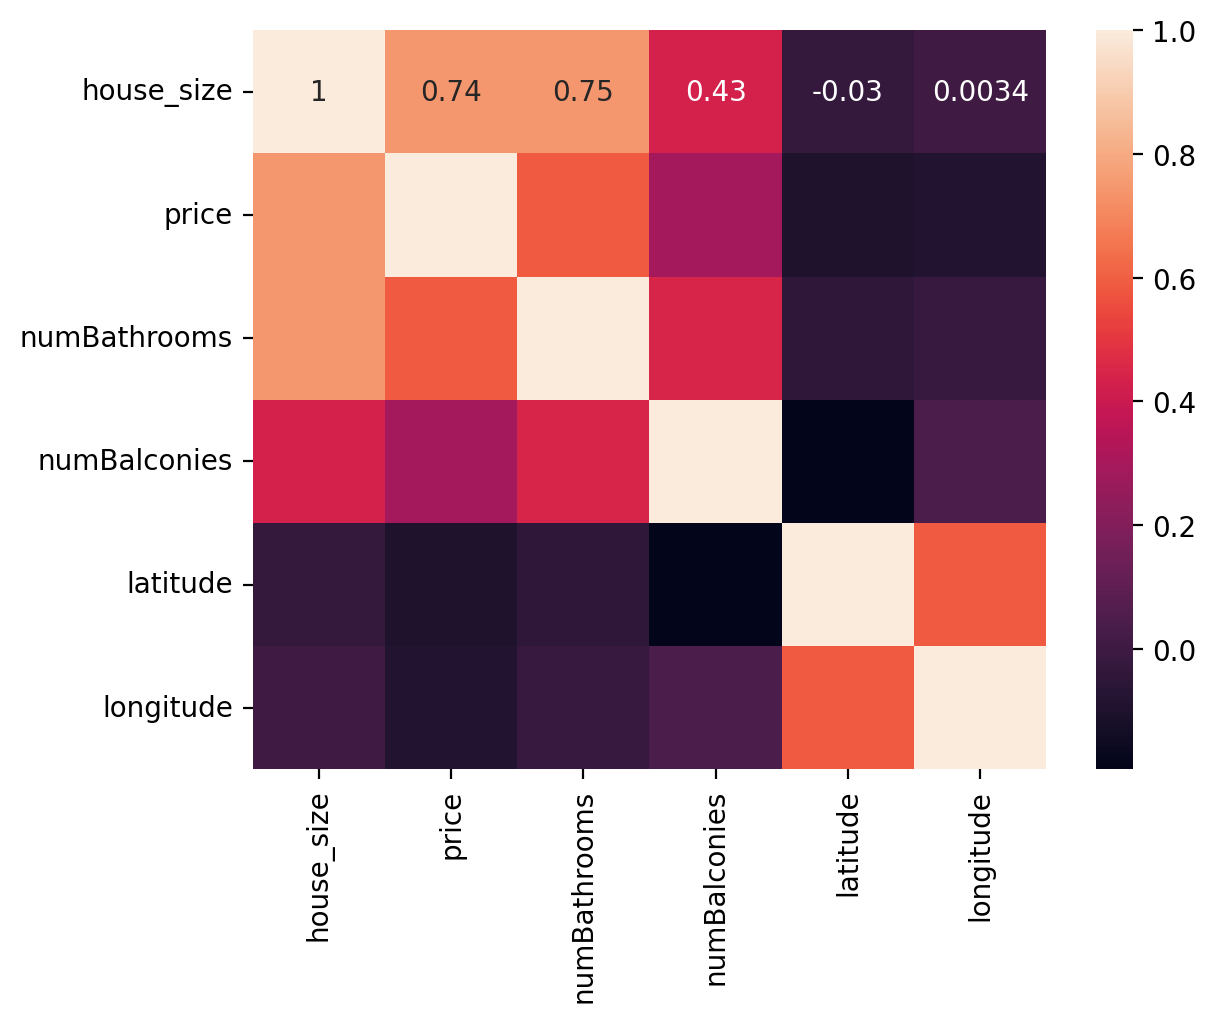

In [25]:
# Correlation Heatmap (Visualisation 1)
sns.heatmap(mumbai[['house_size', 'price', 'numBathrooms', 'numBalconies', 'latitude', 'longitude']].corr(), annot=True)
plt.show()


In [11]:
## statistical Summary
print(mumbai.describe())

        house_size     latitude    longitude         price  numBathrooms  \
count  5000.000000  5000.000000  5000.000000  5.000000e+03   4986.000000   
mean   1003.445200    19.159138    72.953226  6.239421e+04      2.033895   
std     592.373077     0.435495     0.564369  8.874473e+04      0.800861   
min     150.000000    17.468220    72.719688  2.800000e+03      1.000000   
25%     650.000000    19.070265    72.839161  2.100000e+04      2.000000   
50%     900.000000    19.128770    72.884460  4.000000e+04      2.000000   
75%    1200.000000    19.195199    72.995323  7.000000e+04      2.000000   
max    8326.000000    30.888254    91.792137  1.200000e+06      7.000000   

       numBalconies  priceSqFt  
count    733.000000        0.0  
mean       2.064120        NaN  
std        1.095187        NaN  
min        1.000000        NaN  
25%        1.000000        NaN  
50%        2.000000        NaN  
75%        3.000000        NaN  
max        6.000000        NaN  


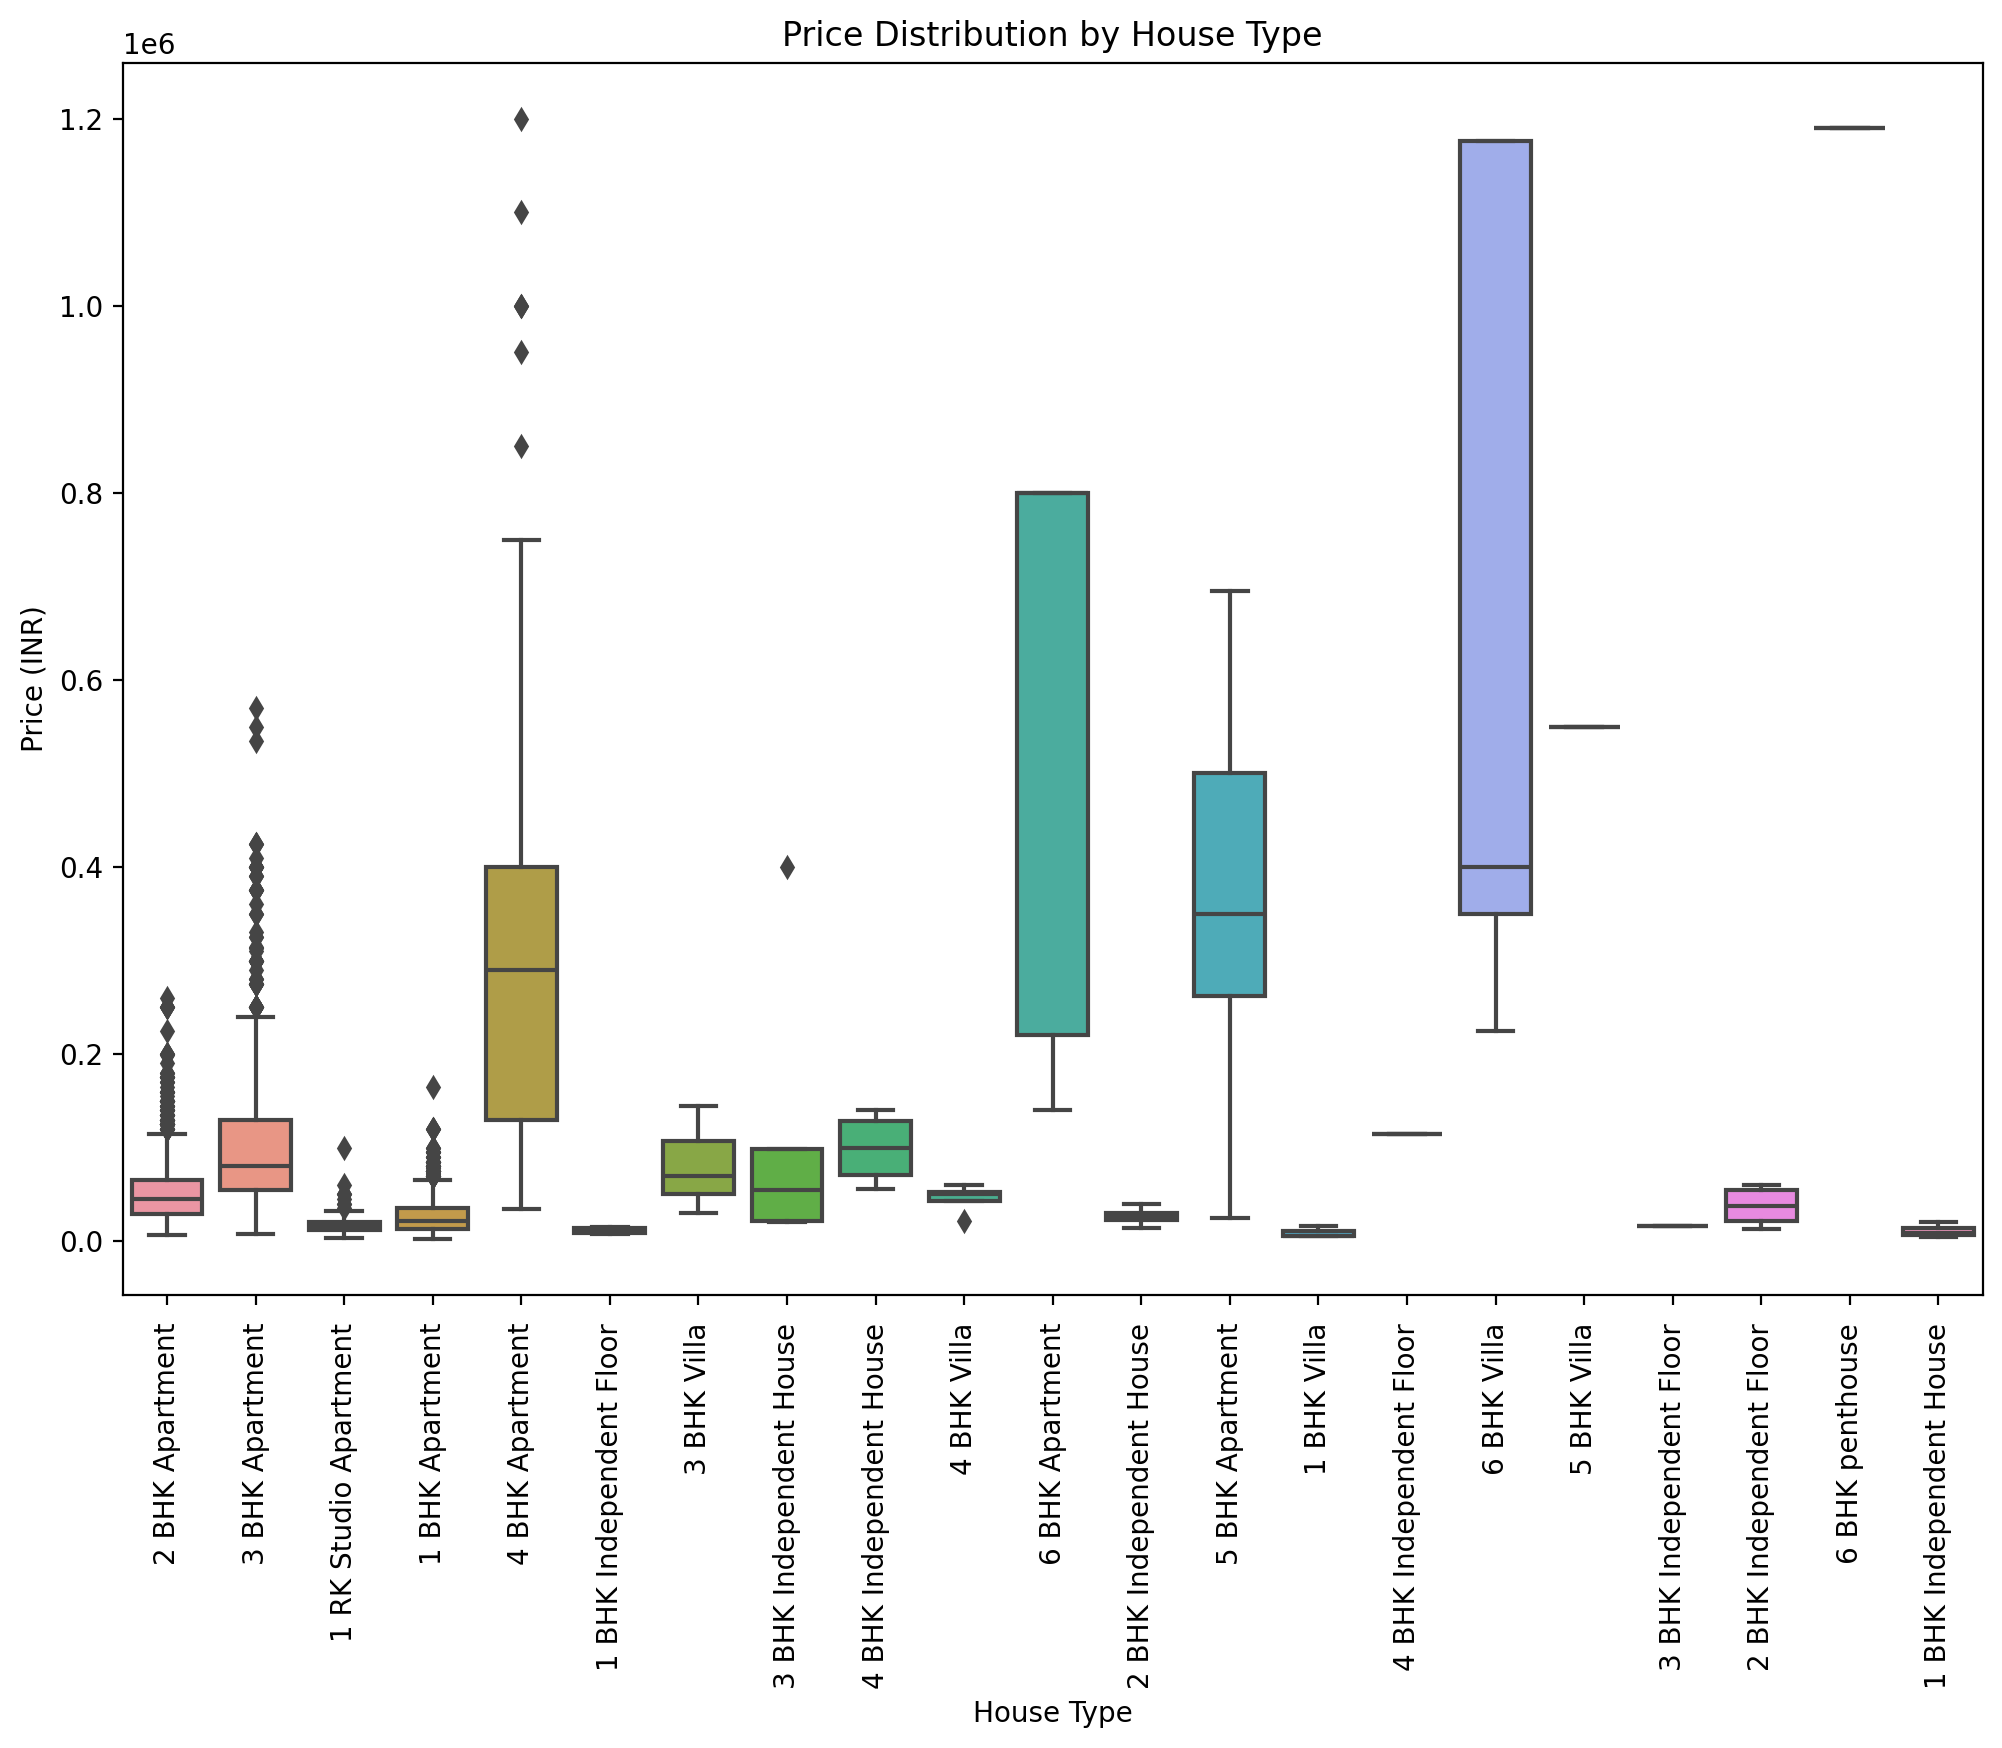

In [12]:
# Distribution of Price by House Type (Visualisation 2)
plt.figure(figsize=(12, 8))
sns.boxplot(x='house_type', y='price', data=mumbai)
plt.xticks(rotation=90)
plt.title('Price Distribution by House Type')
plt.xlabel('House Type')
plt.ylabel('Price (INR)')
plt.show()

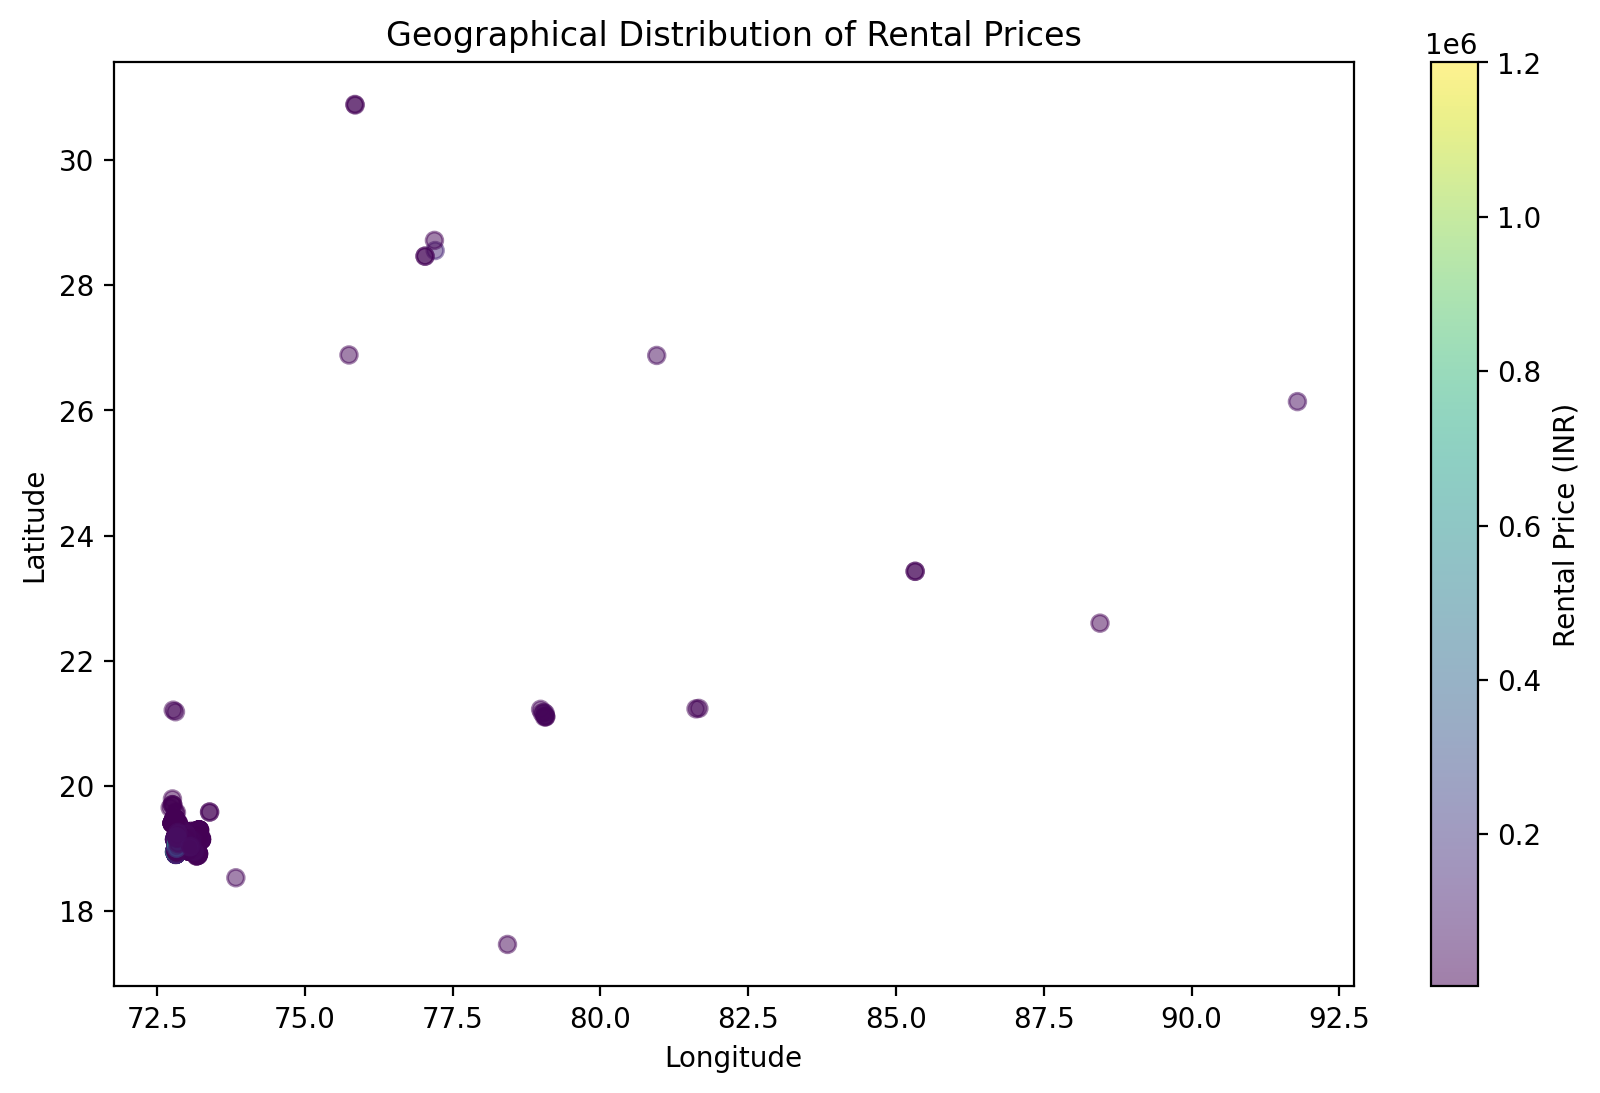

In [14]:
# Geographical Distribution of Prices (Visualisation 3)
plt.figure(figsize=(10, 6))
plt.scatter(mumbai['longitude'], mumbai['latitude'], c=mumbai['price'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Rental Price (INR)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Geographical Distribution of Rental Prices')
plt.show()

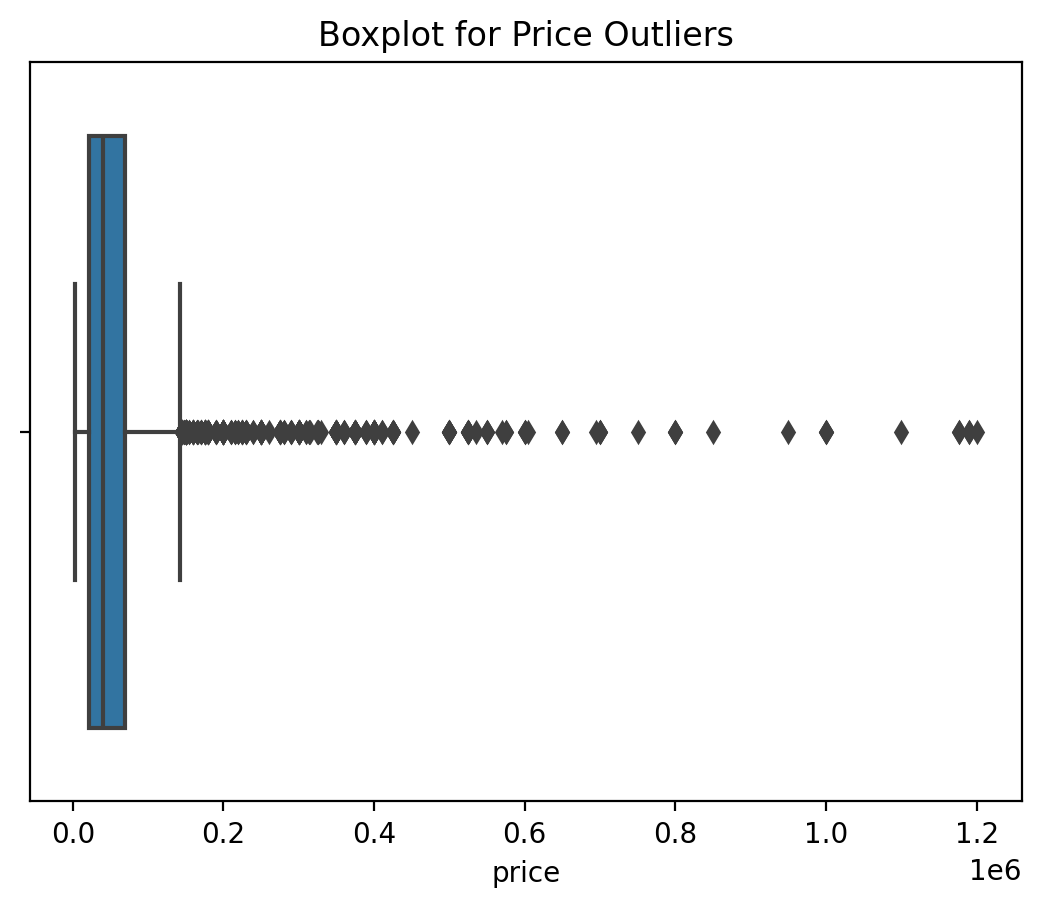

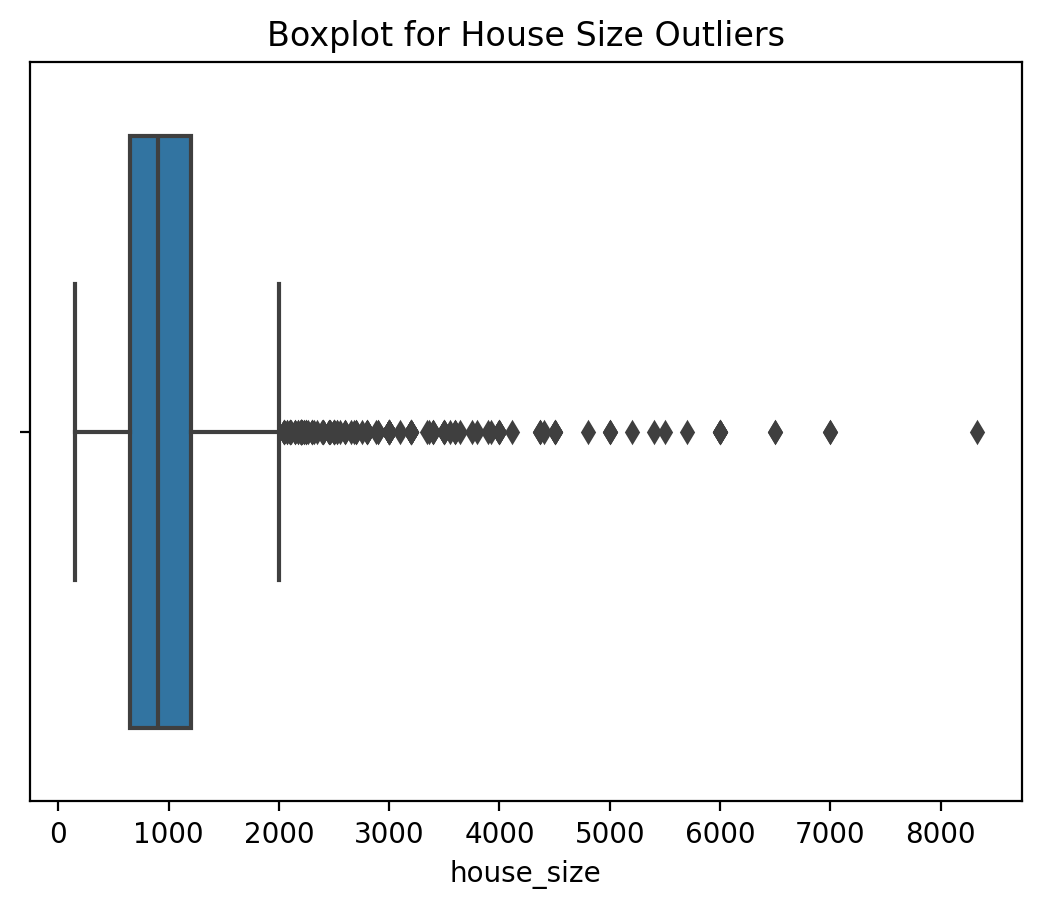

In [15]:
# Outlier detection using boxplots
sns.boxplot(x=mumbai['price'])
plt.title('Boxplot for Price Outliers')
plt.show()

sns.boxplot(x=mumbai['house_size'])
plt.title('Boxplot for House Size Outliers')
plt.show()

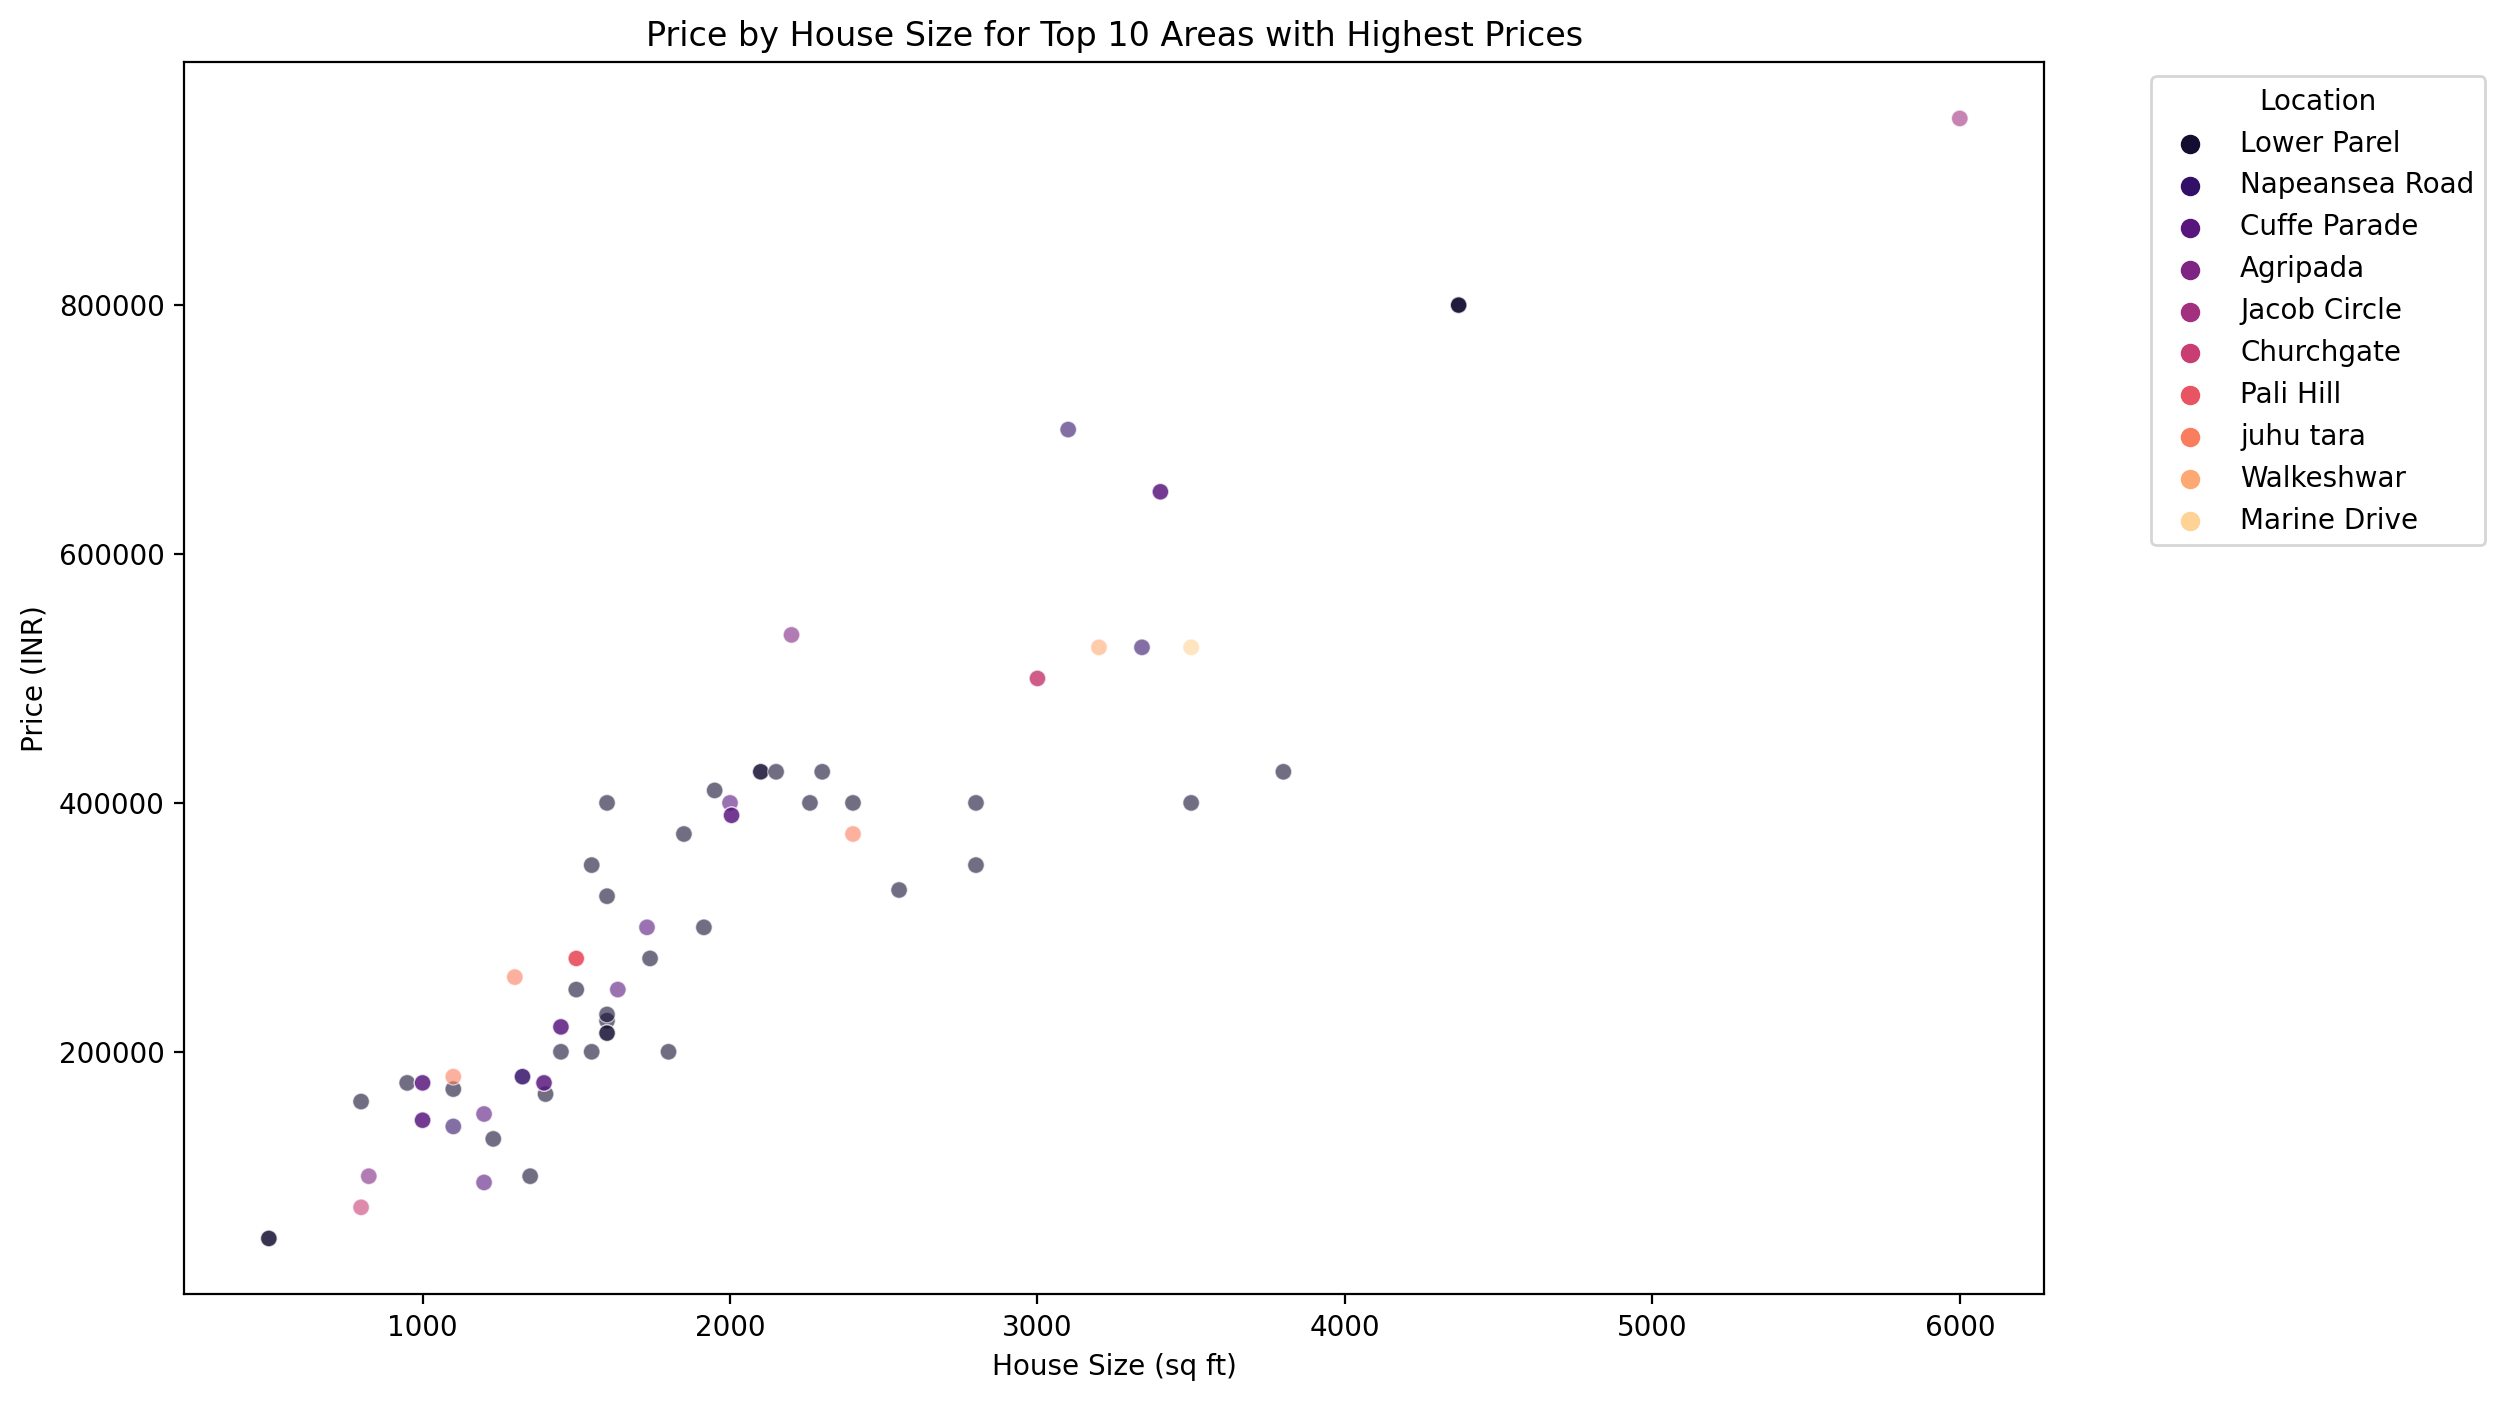

In [23]:
# Scatter Plot of price by house size for the top 10 areas having the highest prices (Visualisation 4)
# Calculation of mean price for each area
area_prices = mumbai.groupby('location')['price'].mean().sort_values(ascending=False)

# Selection of 10 areas with the highest mean prices
top_areas = area_prices.head(10).index

# Filtering of dataframe to include only the top 10 areas
top_areas_data = mumbai[mumbai['location'].isin(top_areas)]

# Plotting the scatterplot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='house_size', y='price', hue='location', data=top_areas_data, palette='magma', alpha=0.6)
plt.title('Price by House Size for Top 10 Areas with Highest Prices')
plt.xlabel('House Size (sq ft)')
plt.ylabel('Price (INR)')
plt.legend(title='Location', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()